# plotly 사용법

https://wikidocs.net/185049

In [2]:
# graph_objects 패키지를  go 로 불러옴
import plotly.graph_objects as go

# go.Figure() 함수를 활용하여 기본 그래프를 생성
fig = go.Figure(
    # Data 입력
    data=[go.Bar(x=[1, 2, 3], y=[1, 3, 2])],
    # layout 입력
    layout=go.Layout(
        title=go.layout.Title(text="A Figure Specified By A Graph Object")
    )
)
#show하면 내 노트북 (주피터 노트북 등)에 그래프가 나타남.
fig.show()

go의 figure는 data, layout을 입력으로 받아야함

data: data
layout: data를 제외한 모든 부분   
ex) Title, legend, Colors, Hover-label, Axes, Shape 

-----
express는 module화 되어있는 go

In [4]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2],title="A Figure Specified By express")

#show하면 내 노트북 (주피터 노트북 등)에 그래프가 나타남.
fig.show()

In [6]:
import open3d as o3d
import numpy as np
# o3d를 사용할 경우
def read_off(path):
    """
    triangle_mesh: general mesh type
    include 3 vertex, 3 edge -> triangle 
    triangle mesh is genally simple and fast 
    """
    data = o3d.io.read_triangle_mesh(path)
    verts      = np.array(data.vertices,dtype = np.float32)
    triangles  = np.array(data.triangles,dtype = np.int32)
    return verts,triangles
path = "./datasets/ModelNet10/"
verts,edge = read_off(path+"sofa/train/sofa_0002.off")

3d도 가능 

In [16]:
fig = go.Figure(
    # Data 입력
    data=[go.Scatter3d(x=verts[:,0],y=verts[:,1],z=verts[:,2],mode ="markers")],
    # layout 입력
    layout=go.Layout(
        title=go.layout.Title(text="3D test")
    )
)
fig.show()

In [7]:
import plotly.express as px
fig = px.scatter_3d(x=verts[:,0],y=verts[:,1],z=verts[:,2])
fig.show()

In [8]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(x=[1, 2, 3], y=[1, 3, 2]))

fig.show()

In [17]:
# 여러개를 합칠 수 있음 
fig = go.Figure(
    # Data 입력
    data=[go.Scatter3d(x=verts[:,0],y=verts[:,1],z=verts[:,2],mode ="markers")],
    # layout 입력
    layout=go.Layout(
        title=go.layout.Title(text="3D test")
    )
)
fig.add_trace(go.Bar(x=[1, 2, 3], y=[1, 3, 2])) # go를 추가함 

fig.show()

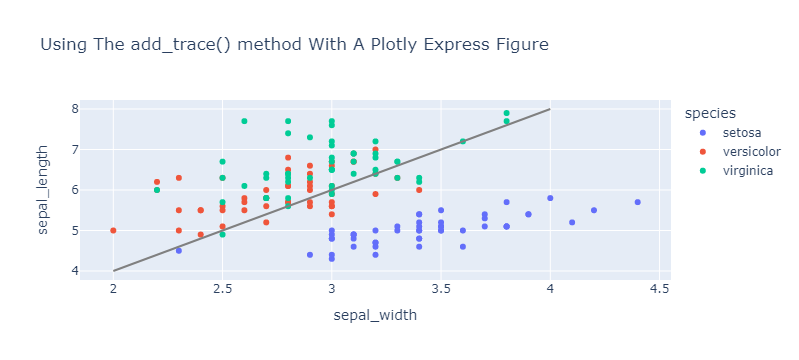

In [18]:
import plotly.express as px

# 데이터 불러오기
df = px.data.iris()

# express를 활용한 scatter plot 생성
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 title="Using The add_trace() method With A Plotly Express Figure")

fig.add_trace(
    go.Scatter(
        x=[2, 4],
        y=[4, 8],
        mode="lines",
        line=go.scatter.Line(color="gray"),
        showlegend=False)
)

fig.show()

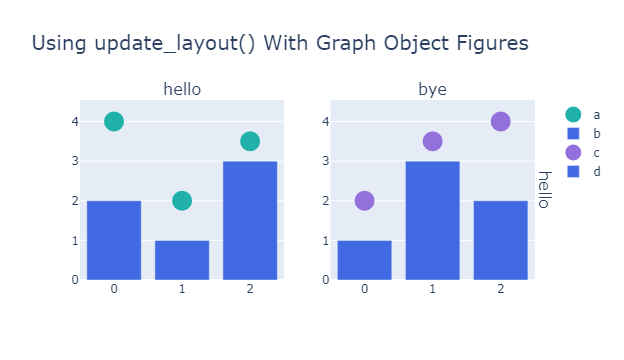

In [52]:
from plotly.subplots import make_subplots

# subplot 생성
fig = make_subplots(rows=1, cols=2,row_titles=["hello"],column_titles=["hello","bye"])

# Trace 추가하기
fig.add_scatter(y=[4, 2, 3.5], mode="markers",
                marker=dict(size=20, color="LightSeaGreen"),
                name="a", row=1, col=1)

fig.add_bar(y=[2, 1, 3],
            marker=dict(color="MediumPurple"),
            name="b", row=1, col=1)

fig.add_scatter(y=[2, 3.5, 4], mode="markers",
                marker=dict(size=20, color="MediumPurple"),
                name="c", row=1, col=2)

fig.add_bar(y=[1, 3, 2],
            marker=dict(color="LightSeaGreen"),
            name="d", row=1, col=2)

# trace 자체를 update하는 것 
fig.update_traces(marker=dict(color="RoyalBlue"),
                  selector=dict(type="bar"))
fig.update_layout(title_text="Using update_layout() With Graph Object Figures",title_font_size=20)
fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=2,row_titles=["hello"],column_titles=["hello","bye"])
fig.add_trace(go.Bar(x=[1, 2, 3], y=[1, 3, 2]))


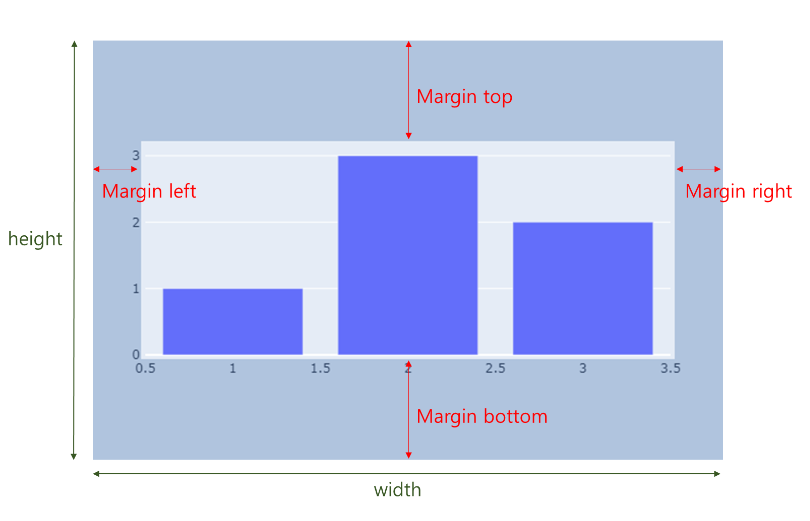


In [36]:
import plotly.graph_objects as go
import plotly.express as px

#데이터 생성
df = px.data.tips()
x = df["total_bill"]
y = df["tip"]

# 그래프 그리기
fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers'))

# 축 타이틀 추가하기
fig.update_xaxes(title_text='Total Bill ($)')
fig.update_yaxes(title_text='Tip ($)')

fig.show()


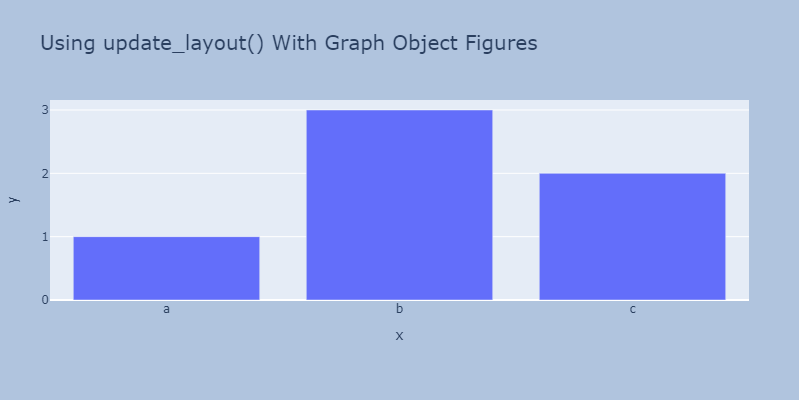

In [41]:
import plotly.express as px

fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])

# 그래프 크기와 margin 설정하기

fig.update_layout(
    title_text="Using update_layout() With Graph Object Figures",title_font_size=20,
    width=600,
    height=400,
    margin_l=50,
    margin_r=50,
    margin_b=100,
    margin_t=100,
    # 백그라운드 칼라 지정, margin 잘 보이게 하기위함
    paper_bgcolor="LightSteelBlue",
)

fig.show()

In [45]:
fig = go.Figure(
    # Data 입력
    data=[go.Scatter3d(x=verts[:,0],y=verts[:,1],z=verts[:,2],mode ="markers")],
    # layout 입력
    layout=go.Layout(
        title=go.layout.Title(text="3D test")
    )
)
# fig.update_xaxes(title_text='X title')
# fig.update_yaxes(title_text='Y title')
fig.update_layout(title_text='3D show')
fig.show()

https://plotly.com/python/animations/

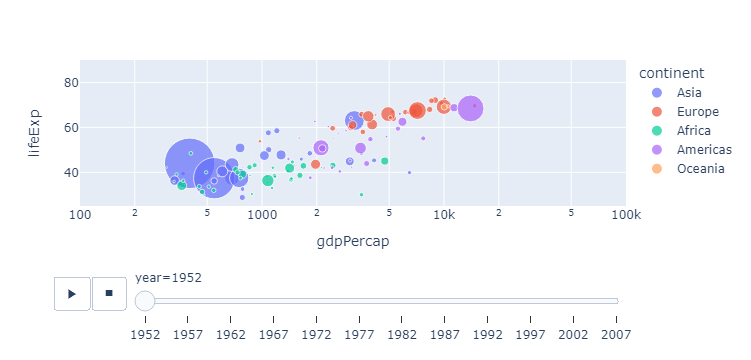

In [46]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [47]:
import plotly.express as px

df = px.data.gapminder()

fig = px.bar(df, x="continent", y="pop", color="continent",
  animation_frame="year", animation_group="country", range_y=[0,4000000000])
fig.show()

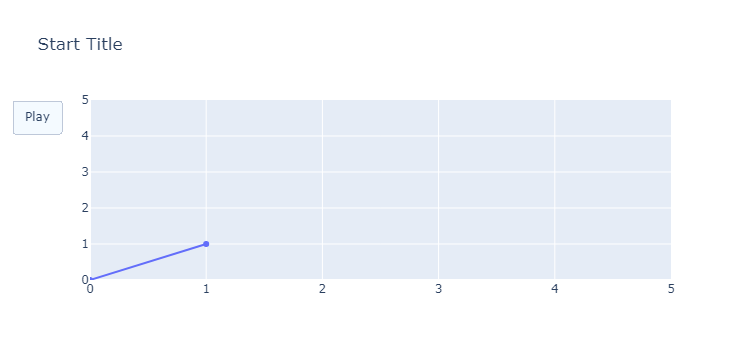

In [48]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Scatter(x=[0, 1], y=[0, 1])],
    layout=go.Layout(
        xaxis=dict(range=[0, 5], autorange=False),
        yaxis=dict(range=[0, 5], autorange=False),
        title="Start Title",
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None])])]
    ),
    frames=[go.Frame(data=[go.Scatter(x=[1, 2], y=[1, 2])]),
            go.Frame(data=[go.Scatter(x=[1, 4], y=[1, 4])]),
            go.Frame(data=[go.Scatter(x=[3, 4], y=[3, 4])],
                     layout=go.Layout(title_text="End Title"))]
    # frame은 언제 1초를 기준으로 어떤 것을 그릴 것인지를 선택하는 것 같음 
)

fig.show()

In [ ]:
import plotly.graph_objects as go

import numpy as np

# Generate curve data
t = np.linspace(-1, 1, 100)
x = t + t ** 2
y = t - t ** 2
xm = np.min(x) - 1.5
xM = np.max(x) + 1.5
ym = np.min(y) - 1.5
yM = np.max(y) + 1.5
N = 50
s = np.linspace(-1, 1, N)
xx = s + s ** 2
yy = s - s ** 2


# Create figure
fig = go.Figure(
    data=[go.Scatter(x=x, y=y,
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=x, y=y,
                     mode="lines",
                     line=dict(width=2, color="blue"))],
    layout=go.Layout(
        xaxis=dict(range=[xm, xM], autorange=False, zeroline=False),
        yaxis=dict(range=[ym, yM], autorange=False, zeroline=False),
        title_text="Kinematic Generation of a Planar Curve", hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
    frames=[go.Frame(
        data=[go.Scatter(
            x=[xx[k]],
            y=[yy[k]],
            mode="markers",
            marker=dict(color="red", size=10))])

        for k in range(N)]
)

fig.show()